100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

number of training samples: 60000
number of testing samples: 10000
datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])
label of the first taining sample:  5
label of the second taining sample:  0


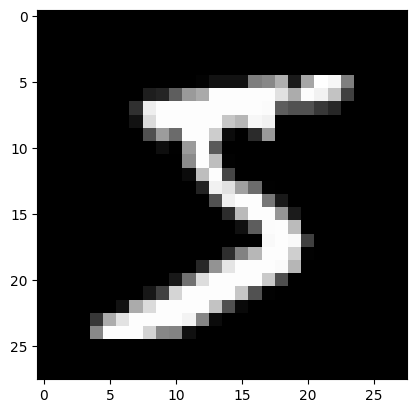

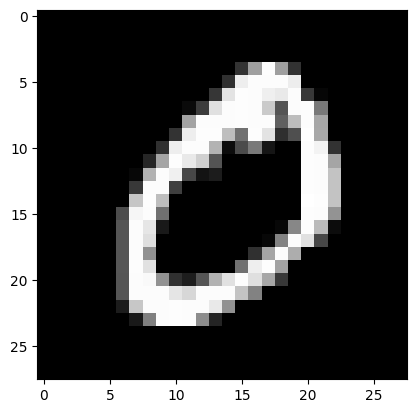

Epoch: 0. Loss: 2.202606201171875. Accuracy: 61.05
Epoch: 1. Loss: 2.0866689682006836. Accuracy: 74.67
Epoch: 2. Loss: 2.052215099334717. Accuracy: 77.97
Epoch: 3. Loss: 1.9741382598876953. Accuracy: 79.82
Epoch: 4. Loss: 1.9732165336608887. Accuracy: 80.98
Epoch: 5. Loss: 1.898044466972351. Accuracy: 81.57
Epoch: 6. Loss: 1.8560588359832764. Accuracy: 82.02
Epoch: 7. Loss: 1.8971686363220215. Accuracy: 82.42
Epoch: 8. Loss: 1.9059557914733887. Accuracy: 82.84
Epoch: 9. Loss: 1.8204714059829712. Accuracy: 83.22
Epoch: 10. Loss: 1.825208067893982. Accuracy: 83.35
Epoch: 11. Loss: 1.832144021987915. Accuracy: 83.54
Epoch: 12. Loss: 1.8701914548873901. Accuracy: 83.69
Epoch: 13. Loss: 1.7930196523666382. Accuracy: 83.75
Epoch: 14. Loss: 1.8260363340377808. Accuracy: 83.89
Epoch: 15. Loss: 1.7527960538864136. Accuracy: 84.06
Epoch: 16. Loss: 1.7965859174728394. Accuracy: 84.22
Epoch: 17. Loss: 1.7391067743301392. Accuracy: 84.37
Epoch: 18. Loss: 1.7597280740737915. Accuracy: 84.49
Epoch: 1

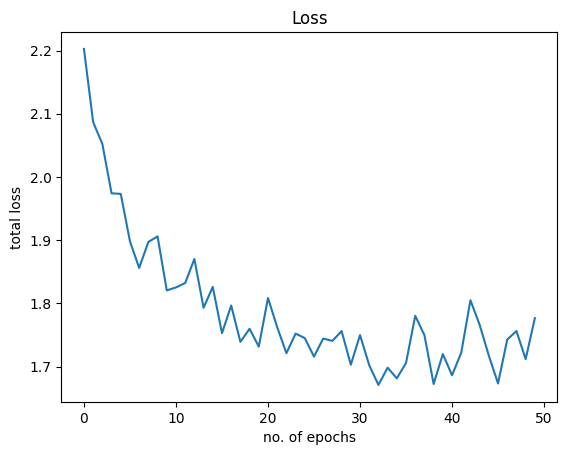

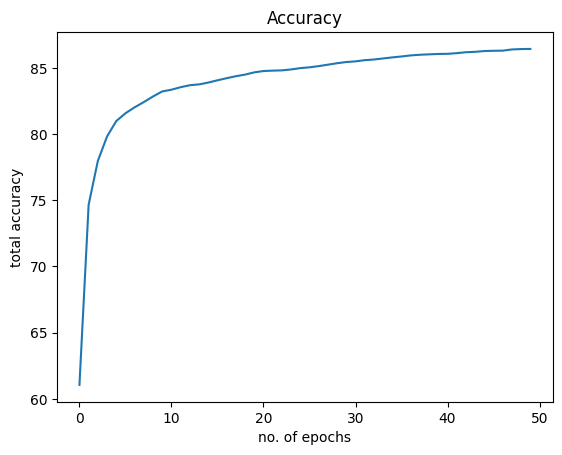

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())
 
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))
print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())
 
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])
 
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()
 
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)
 
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
 
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)
 
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))
 
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()
 
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()